26734
2899
uminusr Gamma fit : 153.8779409106183 -1.2236740557339925 0.021626352368105756
uminusr Normal fit : 2.10699462890625 0.25595319271087646
uminusr BoxCox lamda 2.8502899070547394
uminusr Normal fit : 2.6959595680236816 0.9652283191680908
uminusr Johnson fit : 3.1621081391634878 2.8752455647949944 2.69295383732788 0.4133125997478869


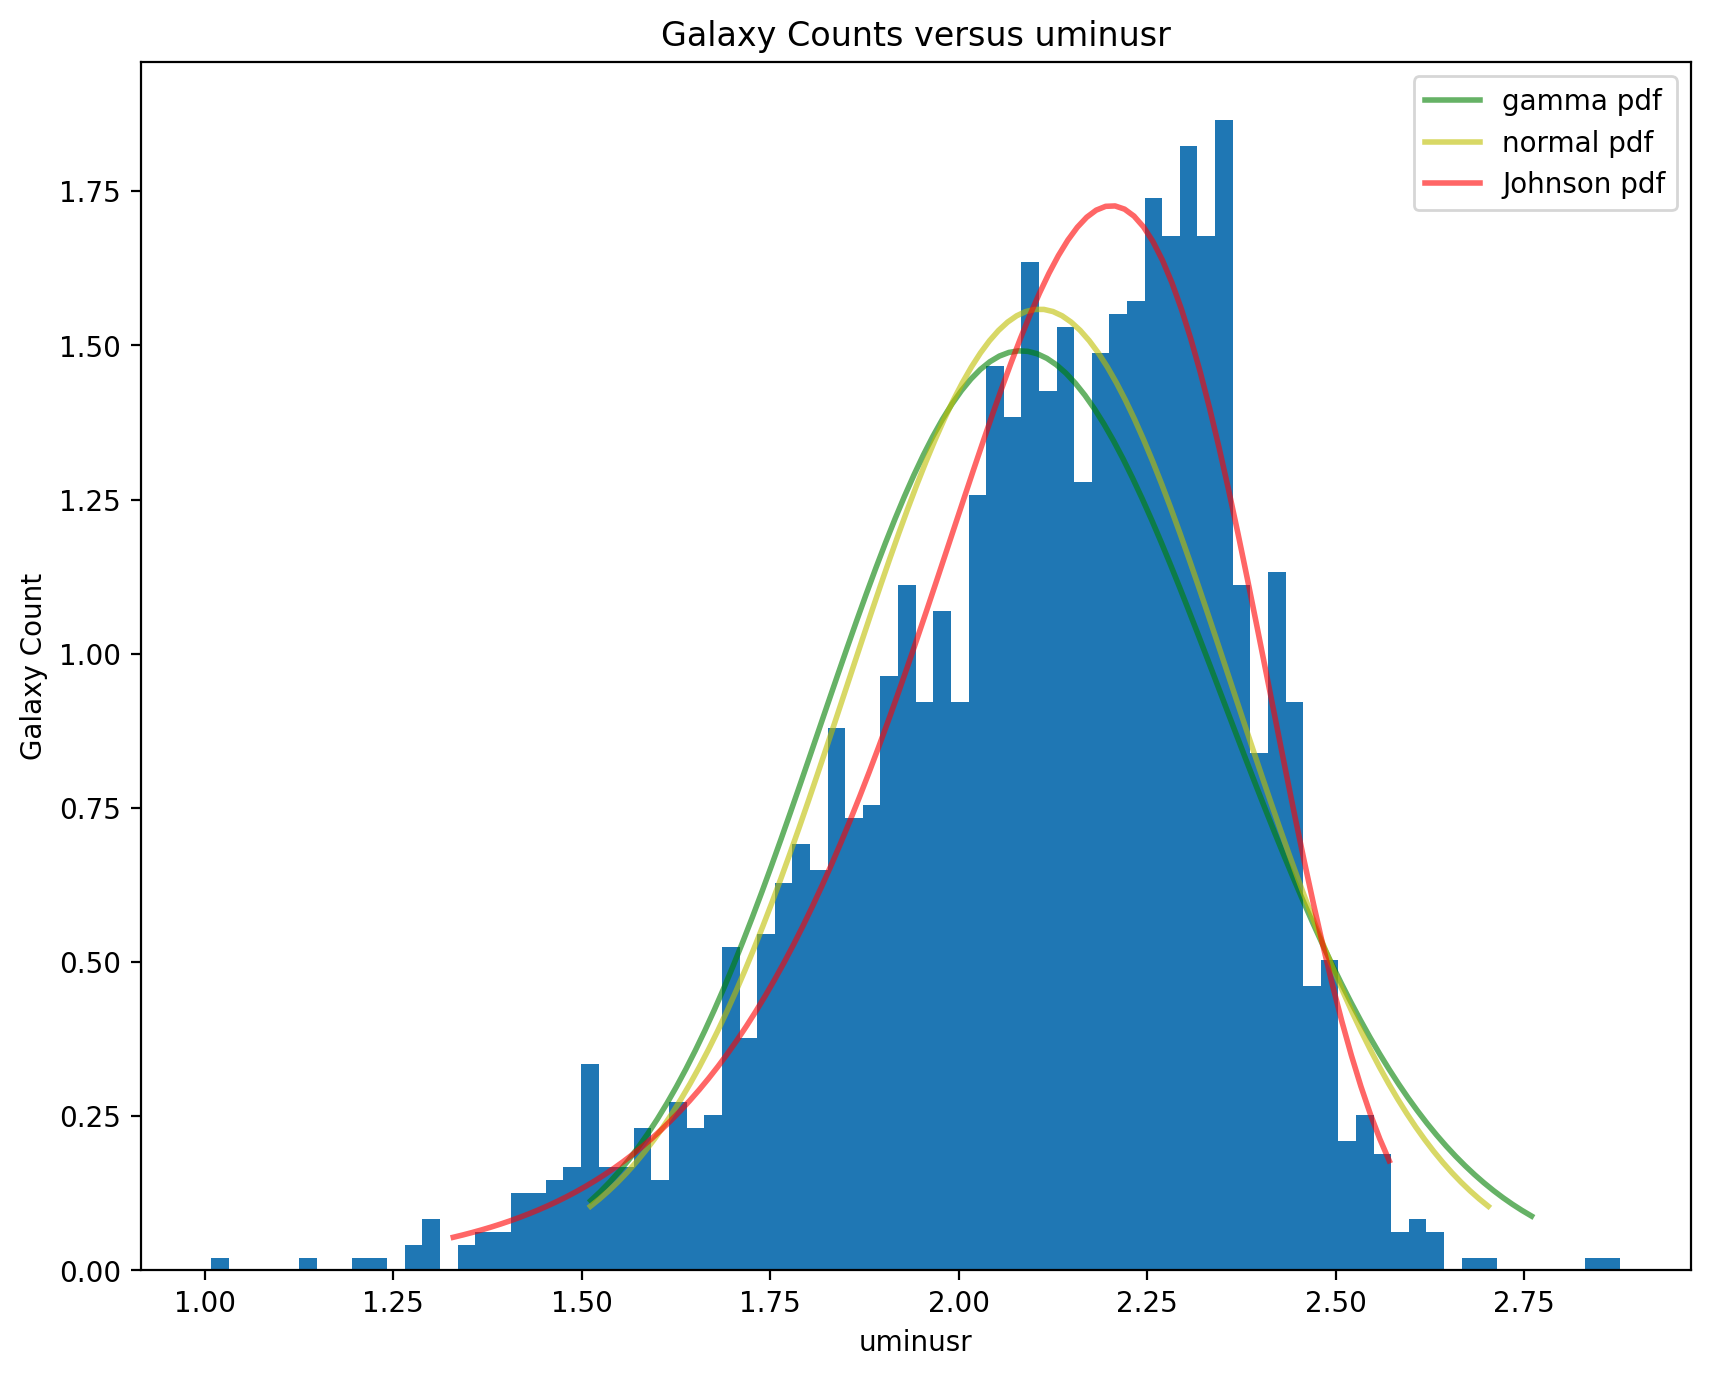

logmstar Gamma Fit 136.67826278277053, 4.232971229821716, 0.0442656653649564
logmstar Normal Fit 10.285866737365723, 0.5097018480300903
logmstar Johnson Fit 13.719930995238869, 9.19586185892657


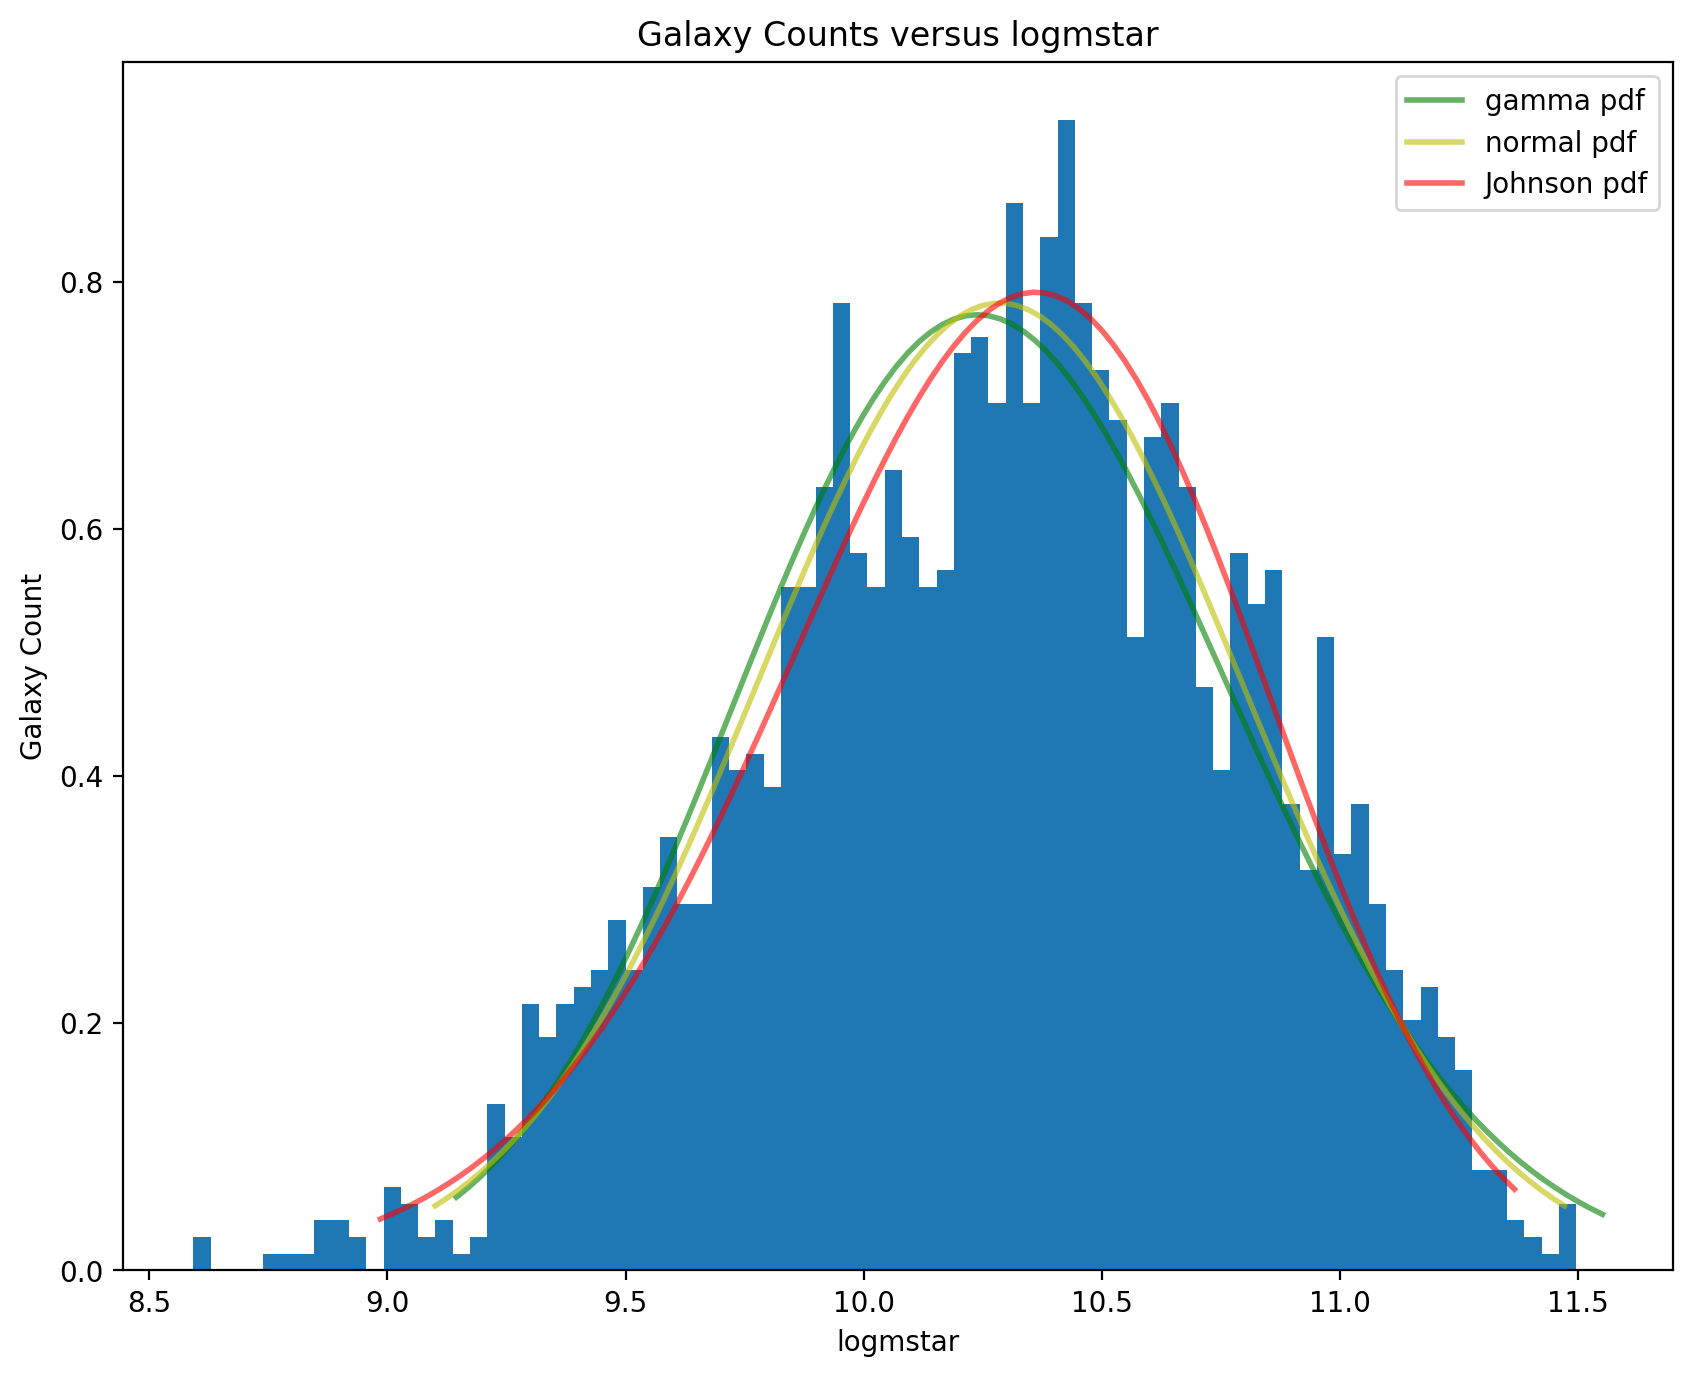

metal Gamma Fit 8.156616990586148, 0.002184476795068552, 0.0011118926595167543
metal Normal Fit 0.011254167184233665, 0.00318585941568017
metal Johnson Fit -1.0513355401278288, 1.698495987183247


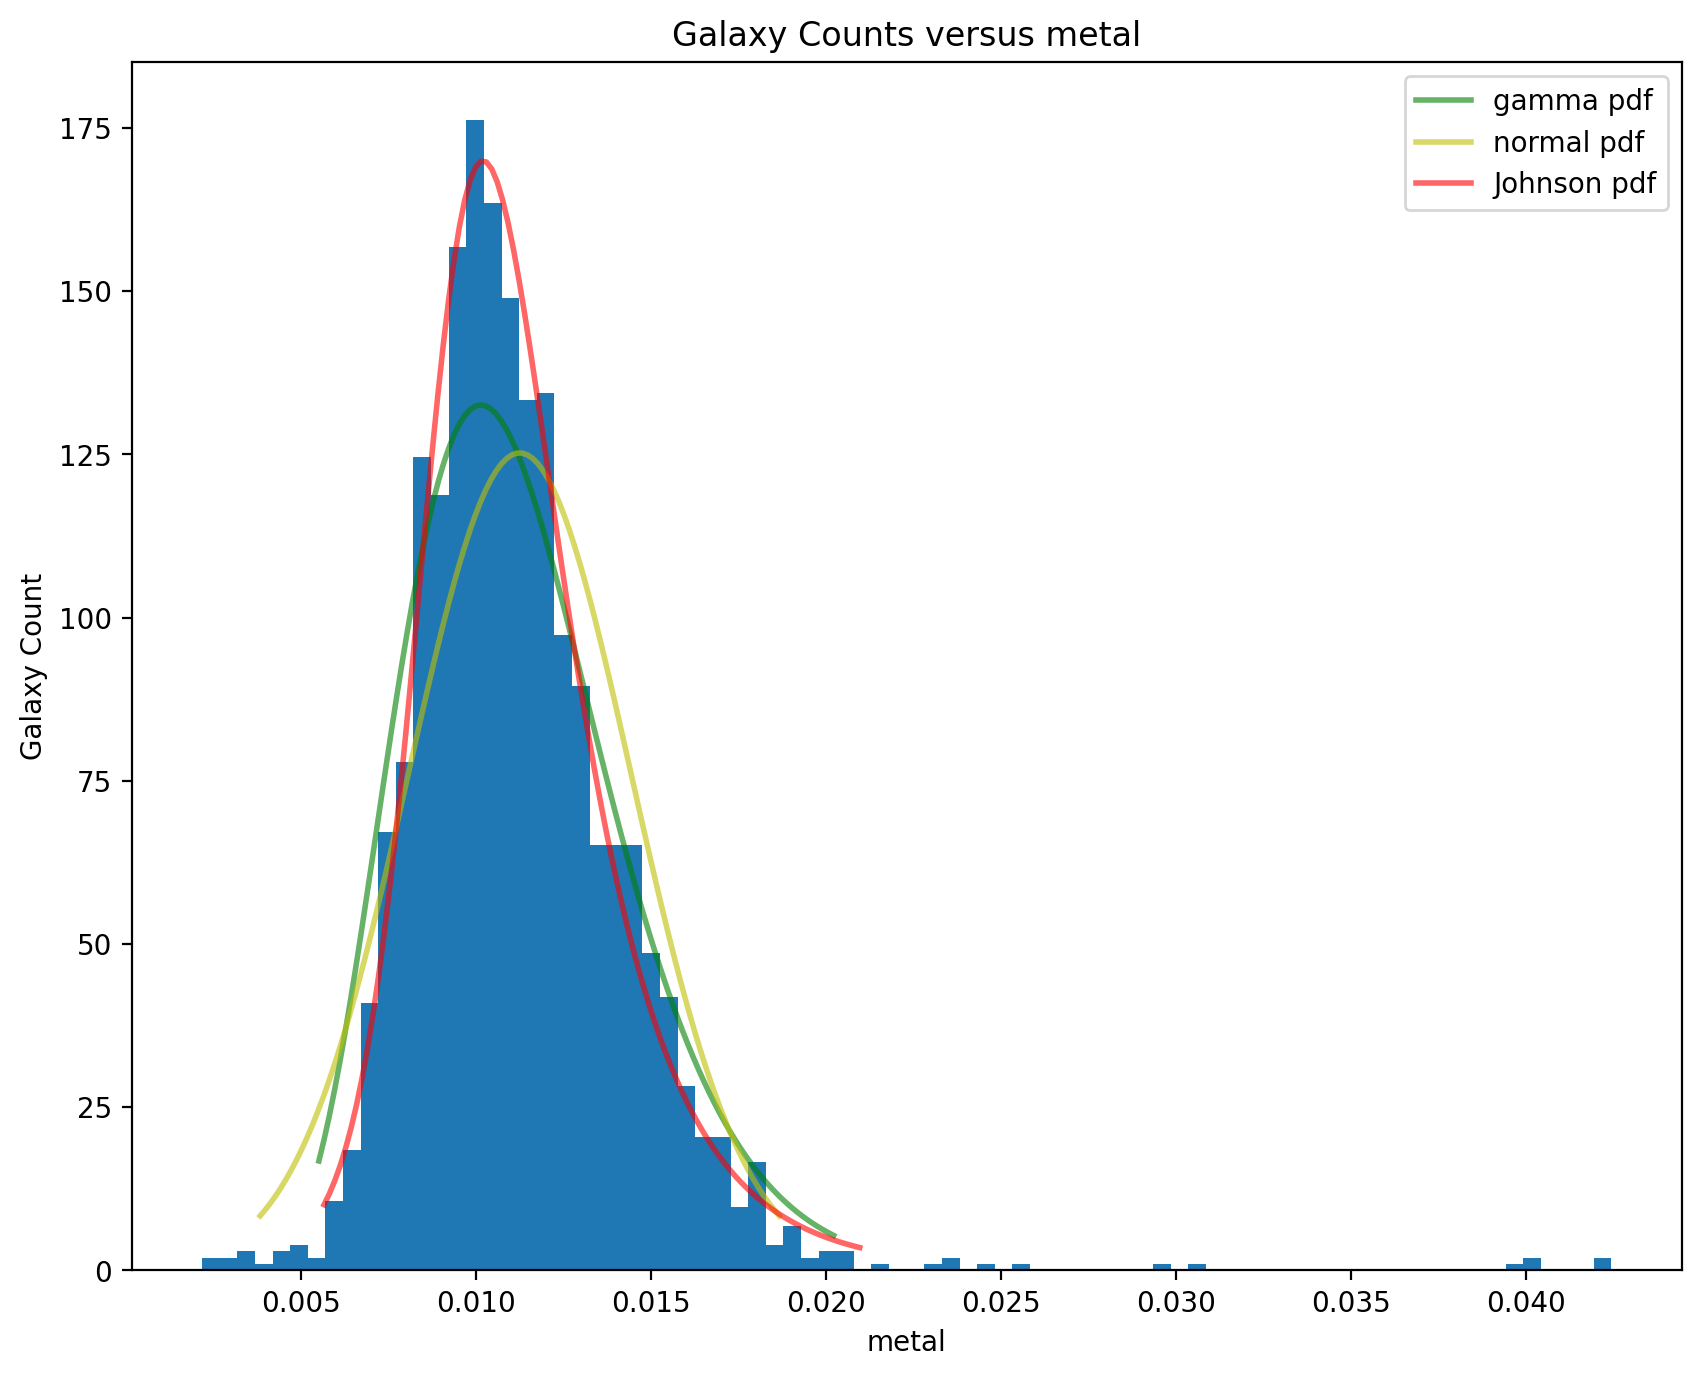

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2494: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


DistanceTo5nn Gamma Fit 1.2465101075895528, 0.23335576300874775, 1.3282043553214302
Max : 9.752
Min : 0.003
Max : 29.979
Min : 0.016


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2494: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2494: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


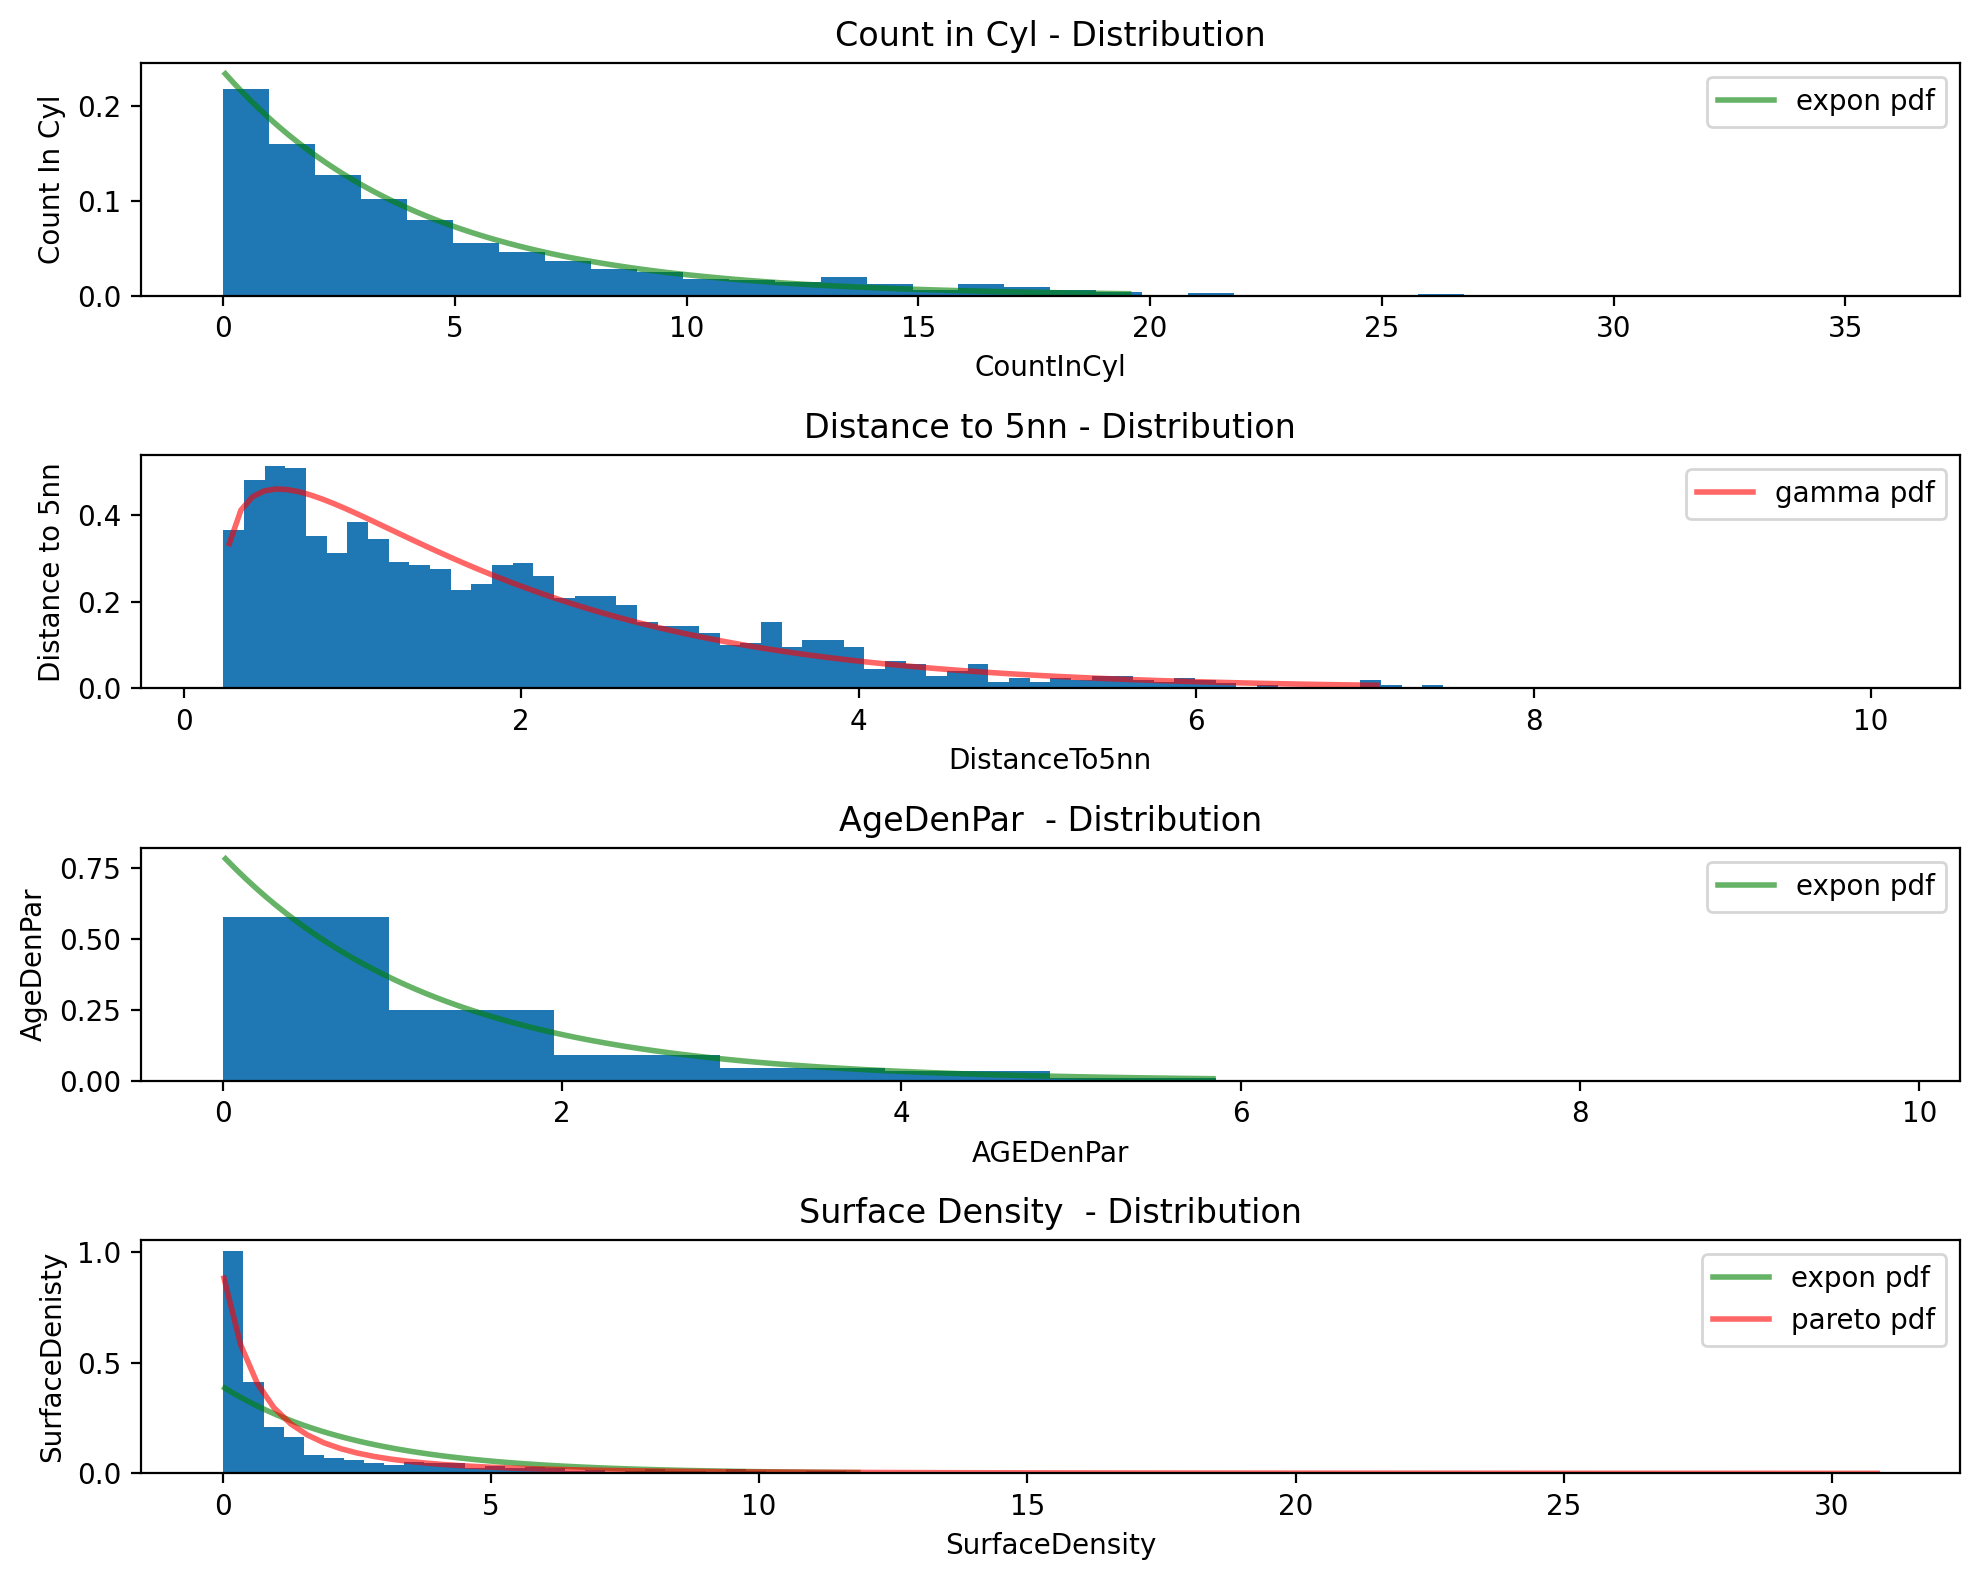

In [20]:
from astropy.table import Table, join
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot

#print(RawMassEClassEmeasure.colnames)
# CLEAN DATA
RErange = Table.read('../../GAMA_Data/VisualMassClassEnviron.fits')
print(len(RErange))
RErange = RErange[RErange['ELLIPTICAL_CODE'] == 1]
print(len(RErange))
RErange = RErange[RErange['SurfaceDensityFlag'] == 0]
#RErange = RErange[RErange['DistanceTo5nnFlag'] == 0]

RErange = RErange[RErange['SurfaceDensity'] < 30]

RErange = RErange[RErange['AGEDenParFlag'] == 0]
RErange = RErange[RErange['CountInCylFlag'] == 0]
RErange = RErange[RErange['uminusr']> 0.001]
RErange = RErange[RErange['metal']> 0.001]

binCount = 80
alphaVal = .3

##### uminusr
fig = plt.figure(figsize=(10, 8), dpi=200)

#fig.suptitle('Plot - Histogram Red Galaxies for Elliptical Galaxies')
#fig.legend(loc="upper right")
#import scipy.stats as stats
from scipy import stats
xfield = 'uminusr'
#counts, bins = np.histogram(RErange1[xfield].data,bins=binCount)
#print(counts)

ax1 = fig.add_subplot(1, 1, 1)
ax1.title.set_text('Galaxy Counts versus uminusr')
ax1.set_ylabel('Galaxy Count')
ax1.set_xlabel(xfield)
#counts, bins = np.histogram(RErange1[xfield].data,bins=binCount)
#ax1.hist(bins[:-1],bins, weights=counts)

ag, bg, cg =stats.gamma.fit(RErange[xfield].data)
print(f"{xfield} Gamma fit : {ag} {bg} {cg}")
xg0, xg1 = stats.gamma.ppf([0.01, 0.99], ag, loc = bg, scale=cg)
xg = np.linspace(xg0,xg1,100)

an, bn =stats.norm.fit(RErange[xfield].data)
print(f"{xfield} Normal fit : {an} {bn}")
xn0, xn1 = stats.norm.ppf([0.01, 0.99], an, scale = bn)
xn = np.linspace(xn0,xn1,100)

# Perform Cox Box
#print(stats.boxcox(RErange[xfield]))
transdata, lamda = stats.boxcox(RErange[xfield])
print(f"{xfield} BoxCox lamda {lamda}")
acn ,bcn =stats.norm.fit(transdata)
print(f"{xfield} Normal fit : {acn} {bcn}")
xcn0, xcn1 = stats.norm.ppf([0.01, 0.99], acn, scale = bcn)
xcn = np.linspace(xcn0,xcn1,100)
# y values for CoxBox
ycn = (lamda / xcn**lamda-1)


aj, bj, cj, dj =stats.johnsonsu.fit(RErange[xfield].data)
print(f"{xfield} Johnson fit : {aj} {bj} {cj} {dj}")
xj0, xj1 = stats.johnsonsu.ppf([0.01, 0.99], aj, bj, loc=cj, scale=dj)
xj = np.linspace(xj0,xj1,100)

ax1.plot(xg, stats.gamma.pdf(xg, ag, loc=bg, scale=cg),'g-', lw=2, alpha=0.6, label='gamma pdf')
ax1.plot(xn, stats.norm.pdf(xn, an, bn),'y-', lw=2, alpha=0.6, label='normal pdf')
ax1.plot(xj, stats.johnsonsu.pdf(xj, aj, bj, loc=cj, scale=dj),'r-', lw=2, alpha=0.6, label='Johnson pdf')
ax1.hist(RErange[xfield].data, bins=binCount, density=True)
#ax1.set_xlabel(xfield)
ax1.legend()
plt.savefig('../../ChartsPlots/DistributionsCounts-minusr.png')
plt.show()

fig = plt.figure(figsize=(10, 8), dpi=200)
xfield ='logmstar'
ax2 = fig.add_subplot(1, 1, 1)
ax2.title.set_text('Galaxy Counts versus logmstar')
ax2.set_ylabel('Galaxy Count')
ax2.set_xlabel(xfield)
#counts, bins = np.histogram(RErange1[xfield].data,bins=binCount)
#ax1.hist(bins[:-1],bins, weights=counts)

alg, blg, clg =stats.gamma.fit(RErange[xfield].data)
print(f"{xfield} Gamma Fit {alg}, {blg}, {clg}")
xlg0, xlg1 = stats.gamma.ppf([0.01, 0.99], alg, loc = blg, scale=clg)
xlg = np.linspace(xlg0,xlg1,100)

aln, bln =stats.norm.fit(RErange[xfield].data)
print(f"{xfield} Normal Fit {aln}, {bln}")
xln0, xln1 = stats.norm.ppf([0.01, 0.99], aln, scale = bln)
xln = np.linspace(xln0,xln1,100)

alj, blj, clj, dlj =stats.johnsonsu.fit(RErange[xfield].data)
print(f"{xfield} Johnson Fit {alj}, {blj}")
xlj0, xlj1 = stats.johnsonsu.ppf([0.01, 0.99], alj, blj, loc=clj, scale=dlj)
xlj = np.linspace(xlj0,xlj1,100)

ax2.plot(xlg, stats.gamma.pdf(xlg, alg, loc=blg, scale=clg),'g-', lw=2, alpha=0.6, label='gamma pdf')
ax2.plot(xln, stats.norm.pdf(xln, aln, bln),'y-', lw=2, alpha=0.6, label='normal pdf')
ax2.plot(xlj, stats.johnsonsu.pdf(xlj, alj, blj, loc=clj, scale=dlj),'r-', lw=2, alpha=0.6, label='Johnson pdf')
ax2.hist(RErange[xfield].data, bins=binCount, density=True)
#ax2.set_xlabel(xfield)
ax2.set_xlabel('logmstar')
ax2.legend()
plt.savefig('../../ChartsPlots/DistributionsCounts-logmstar.png')
plt.show()

fig = plt.figure(figsize=(10, 8), dpi=200)            
xfield ='metal'
ax3 = fig.add_subplot(1, 1, 1)
ax3.title.set_text('Galaxy Counts versus metal')
ax3.set_ylabel('Galaxy Count')
ax3.set_xlabel(xfield)
#counts, bins = np.histogram(RErange1[xfield].data,bins=binCount)
#ax1.hist(bins[:-1],bins, weights=counts)

amg, bmg, cmg =stats.gamma.fit(RErange[xfield].data)
print(f"{xfield} Gamma Fit {amg}, {bmg}, {cmg}")
xmg0, xmg1 = stats.gamma.ppf([0.01, 0.99], amg, loc = bmg, scale=cmg)
xmg = np.linspace(xmg0,xmg1,100)

amn, bmn =stats.norm.fit(RErange[xfield].data)
print(f"{xfield} Normal Fit {amn}, {bmn}")
xmn0, xmn1 = stats.norm.ppf([0.01, 0.99], amn, scale = bmn)
xmn = np.linspace(xmn0,xmn1,100)

amj, bmj, cmj, dmj =stats.johnsonsu.fit(RErange[xfield].data)
print(f"{xfield} Johnson Fit {amj}, {bmj}")
xmj0, xmj1 = stats.johnsonsu.ppf([0.01, 0.99], amj, bmj, loc=cmj, scale=dmj)
xmj = np.linspace(xmj0,xmj1,100)

ax3.plot(xmg, stats.gamma.pdf(xmg, amg, loc=bmg, scale=cmg),'g-', lw=2, alpha=0.6, label='gamma pdf')
ax3.plot(xmn, stats.norm.pdf(xmn, amn, bmn),'y-', lw=2, alpha=0.6, label='normal pdf')
ax3.plot(xmj, stats.johnsonsu.pdf(xmj, amj, bmj, loc=cmj, scale=dmj),'r-', lw=2, alpha=0.6, label='Johnson pdf')
ax3.hist(RErange[xfield].data, bins=binCount, density=True)
#a3.set_xlabel(xfield)
ax3.set_xlabel('metal')
ax3.legend()
plt.savefig('../../ChartsPlots/DistributionsCounts-metal.png')           
plt.show()

#fig = plt.figure(figsize=(10, 8), dpi=200)            
#ax4 = fig.add_subplot(1, 1, 1)
#ax4.title.set_text('Distributions same Plot')

#ax4.plot(xj, stats.johnsonsu.pdf(xj, aj, bj, loc=cj, scale=dj),'r-', lw=2, alpha=0.6, label='uminusr pdf')
#ax4.plot(xlj, stats.johnsonsu.pdf(xlj, alj, blj, loc=clj, scale=dlj),'m-', lw=2, alpha=0.6, label='logmstar pdf')
#ax4.plot(xmj, stats.johnsonsu.pdf(xmj, amj, bmj, loc=cmj, scale=dmj),'y-', lw=2, alpha=0.6, label='metal pdf')
#plt.savefig('../../ChartsPlots/DistributionsCounts-all.png')           
#plt.show()

fig = plt.figure(figsize=(10, 8), dpi=200)
xfield = 'CountInCyl'
#counts, bins = np.histogram(RErange1[xfield].data,bins=binCount)
#print(counts)
ax5 = fig.add_subplot(4, 1, 1)
ax5.title.set_text('Count in Cyl - Distribution')
ax5.set_ylabel('Count In Cyl')
ax5.set_xlabel(xfield)
#ae, be, ce = stats.expon.fit(RErange1[xfield].data)
ae, be = stats.expon.fit(RErange[xfield].data)
xe0, xe1 = stats.expon.ppf([0.01, 0.99], loc=ae, scale=be)
xe = np.linspace(xe0,xe1,100)

#v = stats.pareto.fit(RErange1[xfield].data)
#print(len(v))
ap, bp, cp = stats.pareto.fit(RErange[xfield].data)
xp0, xp1 = stats.pareto.ppf([0.01, 0.99], ap, loc=bp, scale=cp)
xp = np.linspace(xp0,xp1,100)

#ax5.plot(xg, stats.geom.pdf(xg, loc=ag, scale=bg),'g-', lw=2, alpha=0.6, label='geom pdf')
ax5.plot(xe, stats.expon.pdf(xe, loc=ae, scale=be),'g-', lw=2, alpha=0.6, label='expon pdf')
#ax5.plot(xp, stats.pareto.pdf(xp, ap, loc=bp, scale=cp),'r-', lw=2, alpha=0.6, label='pareto pdf')
ax5.hist(RErange[xfield].data, bins=int(0.9+max(RErange[xfield])), density=True)
#ax5.plot(xcn,ycn,'b', label='Cox Box Inverse')
ax5.legend()

xfield = 'DistanceTo5nn'
ax6 = fig.add_subplot(4, 1, 2)
ax6.title.set_text('Distance to 5nn - Distribution')
ax6.set_ylabel('Distance to 5nn')
ax6.set_xlabel(xfield)
ag, bg, cg =stats.gamma.fit(RErange[xfield].data)
print(f"{xfield} Gamma Fit {ag}, {bg}, {cg}")
xg0, xg1 = stats.gamma.ppf([0.01, 0.99], ag, loc=bg, scale=cg)
xg = np.linspace(xg0,xg1, 100)

ax6.hist(RErange[xfield].data, bins=binCount, density=True)
ax6.plot(xg, stats.gamma.pdf(xg, ag, loc=bg, scale = cg),'r-', lw=2, alpha=0.6, label='gamma pdf')
ax6.legend()

xfield = 'AGEDenPar'
ax7 = fig.add_subplot(4, 1, 3)
ax7.title.set_text('AgeDenPar  - Distribution')
ax7.set_ylabel('AgeDenPar')
ax7.set_xlabel(xfield)
print('Max : '+str(max(RErange[xfield])))
print('Min : '+str(min(RErange[xfield])))

aae, bae = stats.expon.fit(RErange[xfield].data)
xae0, xae1 = stats.expon.ppf([0.01, 0.99], loc=aae, scale=bae)
xae = np.linspace(xae0,xae1,100)

#v = stats.pareto.fit(RErange1[xfield].data)
#print(len(v))
aap, bap, cap = stats.pareto.fit(RErange[xfield].data)
xap0, xap1 = stats.pareto.ppf([0.01, 0.99], aap, loc=bap, scale=cap)
xap = np.linspace(xap0,xap1,100)

#ax2.plot(xg, stats.geom.pdf(xg, loc=ag, scale=bg),'g-', lw=2, alpha=0.6, label='geom pdf')
ax7.plot(xae, stats.expon.pdf(xae, loc=aae, scale=bae),'g-', lw=2, alpha=0.6, label='expon pdf')
#ax7.plot(xap, stats.pareto.pdf(xap, aap, loc=bap, scale=cap),'r-', lw=2, alpha=0.6, label='pareto pdf')
ax7.hist(RErange[xfield], bins=int(0.9+max(RErange[xfield])), density=True)
#ax4.plot(xag, stats.gamma.pdf(xag, aag, loc=bag, scale = cag),'r-', lw=2, alpha=0.6, label='gamma pdf')
#ax7.plot(xcn,ycn,'b', label='Cox Box Inverse')
ax7.legend()

xfield = 'SurfaceDensity'
ax8 = fig.add_subplot(4, 1, 4)
ax8.title.set_text('Surface Density  - Distribution')
ax8.set_ylabel('SurfaceDenisty')
ax8.set_xlabel(xfield)
print('Max : '+str(max(RErange[xfield])))
print('Min : '+str(min(RErange[xfield])))

ase, bse = stats.expon.fit(RErange[xfield].data)
xse0, xse1 = stats.expon.ppf([0.01, 0.99], loc=ase, scale=bse)
xse = np.linspace(xse0,xse1,100)

#v = stats.pareto.fit(RErange1[xfield].data)
#print(len(v))
asp, bsp, csp = stats.pareto.fit(RErange[xfield].data)
xsp0, xsp1 = stats.pareto.ppf([0.01, 0.99], asp, loc=bsp, scale=csp)
xsp = np.linspace(xsp0,xsp1,100)

#ax8.plot(xg, stats.geom.pdf(xg, loc=ag, scale=bg),'g-', lw=2, alpha=0.6, label='geom pdf')
ax8.plot(xse, stats.expon.pdf(xse, loc=ase, scale=bse),'g-', lw=2, alpha=0.6, label='expon pdf')
ax8.plot(xsp, stats.pareto.pdf(xsp, asp, loc=bsp, scale=csp),'r-', lw=2, alpha=0.6, label='pareto pdf')
ax8.hist(RErange[xfield].data, bins=binCount, density=True)
#ax8.plot(xag, stats.gamma.pdf(xs, aas, loc=bs, scale = cs),'r-', lw=2, alpha=0.6, label='gamma pdf')
#ax8.plot(xcn,ycn,'b', label='Cox Box Inverse')
ax8.legend()

fig.tight_layout()
plt.savefig('../../ChartsPlots/DistributionsEnvironments.png')        
plt.show()



